## Import necessary modules

In [33]:
import matplotlib.pyplot as plt

from octopus.dataset import load_dataset
from octopus.experiments.experiment import trace_elm
from octopus.preprocessing import kernel_builder, compute_grad_image
from octopus.visualization import plotting

In [42]:
from importlib import reload
reload(plotting)

ImportError: module trace_elm not in sys.modules

## Load the test dataset

In [34]:
scans, base, gt = load_dataset()

## Pick test index and get respective scan, groundtruth ELM, SegNet/Base ELM 

In [35]:
test_idx = 200
test_scan = scans[test_idx]
test_gt = gt[test_idx]
test_base = base[test_idx]

## Compute the gradient image for octopus

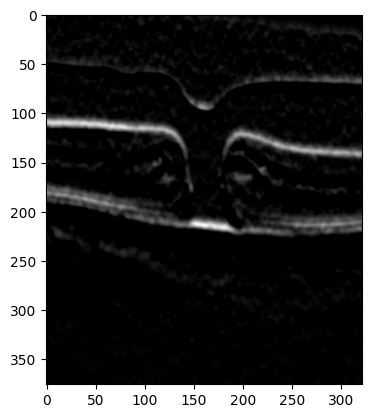

In [36]:
kernel = kernel_builder([21, 5])
test_grad = compute_grad_image(test_scan, kernel)
plt.imshow(test_grad, cmap='gray')

## Run OCTOPUS

In [37]:
pred = trace_elm(test_grad, test_base, discontinuity_threshold=25, num_runs=50)

## Plot results

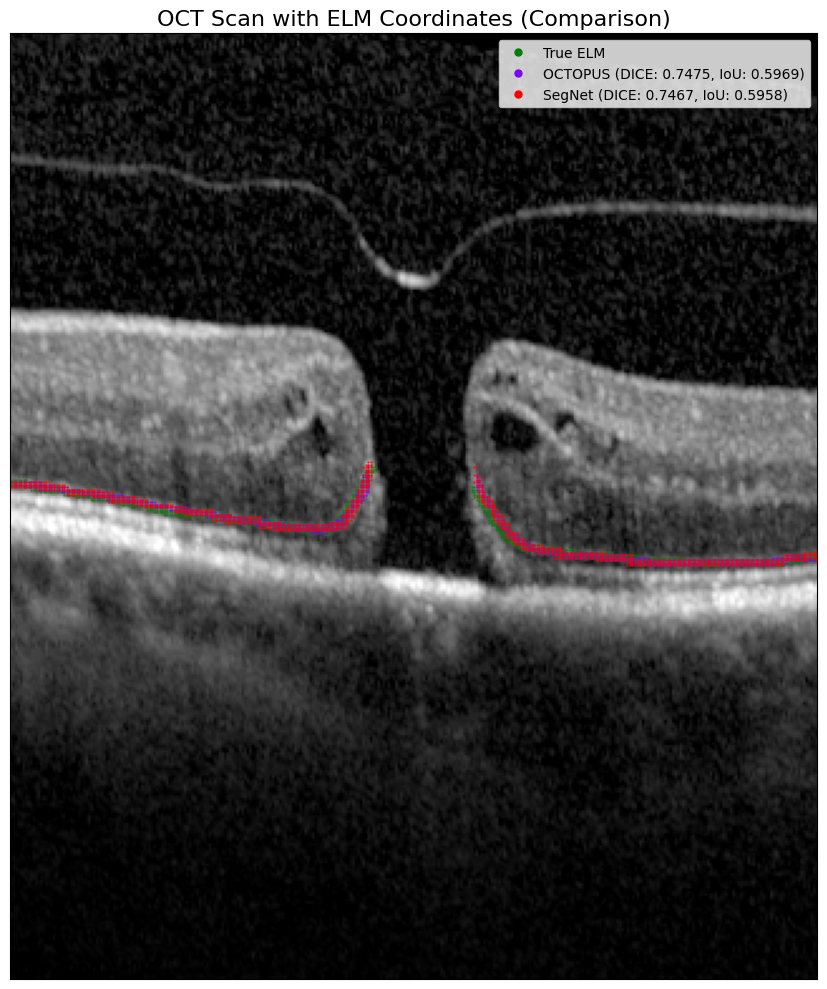

In [40]:
fig = plotting.display_scan(test_scan, {'OCTOPUS': pred, 'SegNet': test_base}, gt_elm=test_gt)